Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты'

Требуется выполнить следующее задание:
#   Задание                                                             Баллы
1   Загрузите файл HR.csv в pandas dataframe                            5
2   Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).                        10
3   Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.                                            10
4   Рассчитайте сколько сотрудников работает в каждом
департаменте.                                                           5
5   Показать распределение сотрудников по зарплатам.                    5
6   Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
7   Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
8   Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
10
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9   Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки                             20
10  Загрузить jupyter notebook с решение на github и прислать ссылку    5

Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Загрузите файл HR.csv в pandas dataframe
hr = pd.read_csv('EXAM/HR.csv') # , dtype={"satisfaction_level": np.float64, "c": np.float64, "d": "Int64"})
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
hr.median()

C:\Users\iplah\AppData\Local\Temp/ipykernel_13544/2113691466.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hr.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [46]:
# Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


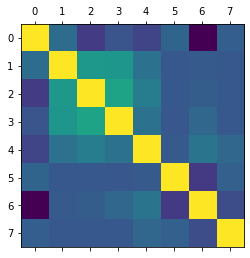

In [5]:
plt.matshow(hr.corr())

In [19]:
# Рассчитайте сколько сотрудников работает в каждом департаменте.
hr.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [3]:
# Показать распределение сотрудников по зарплатам
hr.groupby('salary').size()

salary
high      1237
low       7316
medium    6446
dtype: int64


In [15]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
hr.groupby(['department', 'salary']).size()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

In [27]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

# x = hr.drop_duplicates('salary')
hr[['salary','average_montly_hours']].groupby('salary').mean('average_montly_hours')

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


In [58]:
from scipy.stats.stats import spearmanr
sal_col = hr['salary'].values
# print(sal_col)
mon_col = np.float64(hr['average_montly_hours'].values)
# print(mon_col)
res, _ = spearmanr(sal_col, mon_col)
res

0.006139987163807338

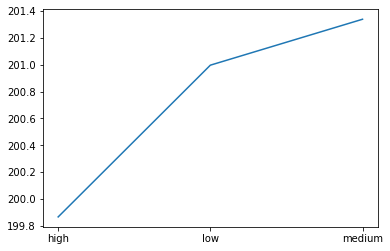

In [13]:
plt.plot(hr[['salary','average_montly_hours']].groupby('salary').mean('average_montly_hours'))

In [ ]:
# корреляция не подтвердилась

In [41]:
hr[['salary','department','average_montly_hours']].groupby(['department', 'salary']).mean('average_montly_hours')

average_montly_hours
department  salary                      
IT          high              194.927711
            low               201.382594
            medium            204.295327
RandD       high              199.745098
            low               198.747253
            medium            202.954301
accounting  high              205.905405
            low               199.899441
            medium            201.465672
hr          high              209.066667
            low               202.456716
            medium            193.863510
management  high              200.248889
            low               200.744444
            medium            202.653333
marketing   high              185.575000
            low               204.487562
            medium            196.869681
product_mng high              194.632353
            low               201.048780
            medium            199.637076
sales       high              201.178439
            low               200.363030
            medium            201.520316
support     high              203.985816
            low               198.900524
            medium            202.535032
technical   high              200.044776
            low               203.064869
            medium            202.248474

In [16]:
'''Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 10
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов'''

# Средняя степень удовлетворенности
hr[['left','satisfaction_level']].groupby('left').mean('satisfaction_level')

,satisfaction_level
left,
0,0.666810
1,0.440098


In [59]:
# Среднее количество проектов
hr[['left','number_project']].groupby('left').mean('number_project')

,number_project
left,
0,3.786664
1,3.855503


In [35]:
# Доля сотрудников с повышением за последние 5 лет
# hr[['promotion_last_5years', 'left']].groupby('left').size()
hr[['promotion_last_5years', 'left']].groupby('left').size()/hr['promotion_last_5years'].count()

left
0    0.761917
1    0.238083
dtype: float64